# TFM. Parte 1. Análisis Exploratorio de Datos y preparación del conjunto de datos

En esta sección del TFM, realizaremos la carga de los datos para continuar con un análisis exploratorio y estadístico de los datos. Observaremos si es necesario hacer limpieza y daremos el formato necesario a las diferentes variables para su análisis.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### 1. Carga de los datos y entendimiento variables

In [2]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('insurance_claims.csv')
df.shape

(1000, 40)

Observamos un total de 1000 ítems con 40 variables cada uno.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

Adicionalmente, observamos que la variable c39 está llena de valores nules y por tanto la podemos eliminar. Cabe destacar que el resto de variables no tienen ningún valor de tipo nulo.

In [4]:
df = df.drop('_c39',1)

Procedemos a observar diversos estadísticos para cada una de las variables numéricas y así describir cada una de las variables del conjunto de datos.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


Procedemos a hacer un entendimiento de las variables numéricas del conjunto de datos:
* **months_as_customer**. Meses de antigüedad del cliente, observamos que puede ir desde 0 hasta 479 meses. Cabe destascar que el percentil 50% es de 199.05 por lo que la mitad del conjunto de datos tiene más de 200 meses de antigüedad.
* **age**. Edad del cliente, observamos que va desde los 19 hasta los 64.
* **policy_number**. Número identificativo de la póliza.
* **policy_deductable**. Cantidad máxima que paga el asegurado en caso de una reclamación. Observamos que va desde 500 hasta 2000.
* **policy_annual_premium**. Prima anual de la póliza.
* **umbrella_limit**. Cobertura de responsabilidad civil adicional.
* **insured_zip**. Código postal del asegurado. Tendría que considerarse como una variable categórica.
* **capital-gains**. Ganancias con la póliza.
* **capital-loss**. Pérdidas con la póliza.
* **incident_hour_of_the_day**. Hora del dia en el que se produjo el incidente que ocasiona el reclamo de la póliza. Va desde las 0 hasta las 23.
* **number_of_vehicles_involved**. número de vehículos involucrados en el accidente.
* **bodily_injuries**. número de daños corporales.
* **witnesses**. número de testigos. El máximo es 3 y el 75% de la población tiene como mínimo 1 testigo.
* **total_claim_amount**. Cantidad total reclamada en la póliza por el siniestro.
* **injury_claim**. Cantidad total reclamada por heridas físicas ocasionadas por el siniestro.
* **property_claim**. Cantidad total reclamada por daños de propiedades ocasionados por el siniestro.
* **vehicle_claim**. Cantidad total reclamada por daños en el vehículo ocasionados por el siniestro.
* **auto_year**. Año del vehículo asegurado.


Observamos que la variable umbrella limit tiene un valor mínimo de -1000000.00. Como esto no tiene sentido, ya que no puede haber una cobertura de responsabilidad civil negativa, se decide poner el valor a cero. 

Primero comprobamos los distintos valores que toma la variable. Como solamente hay un valor negativo, procedemos a sustituirlo por 0.

In [6]:
df.umbrella_limit.unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [7]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)
df.umbrella_limit.unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  2000000], dtype=int64)

A continuación, procedemos a realizar el mismo análisis para las variable categóricas (filtrando por el tipo "object")

In [8]:
df.describe(include='object').transpose()

,count,unique,top,freq
policy_bind_date,1000,951,1992-08-05,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2015-02-02,28
incident_type,1000,4,Multi-vehicle Collision,419


In [9]:
cols = ['policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make','auto_model',
    'fraud_reported']
for i in cols:
    print(str(i)+": ")
    print(df[i].value_counts())
    print(" ")

policy_state: 
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
 
policy_csl: 
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
 
insured_sex: 
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
 
insured_education_level: 
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
 
insured_occupation: 
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
 
insured_hobbies: 
reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
mov

Procedemos a hacer un entendimiento de las variables categóricas del conjunto de datos:
* **policy_bind_date**. Fecha efecto de la póliza.
* **policy_state**. Estado dentro de los EEUU donde se emitió la póliza.
* **policy_csl** Cobertura máxima en dólares de la póliza para daños corpolares / daños de propiedad.
* **insured_sex**. Sexo del asegurado.
* **insured_education_level**. Nivel de educación del asegurado.
* **insured_occupation**. Sector de ocupación del asegurado.
* **insured_hobbies** Hobbies del asegurado.
* **insured_relationship**. Estado civil del asegurado.
* **incident_date**. Fecha del siniestro.
* **incident_type**. Tipo de siniestro de auto.
* **collision_type**. Tipo de colisión, observamos que hay algunos valores como ? que interpretamos como desconocido o no informado.
* **incident_severity**. Nivel de severidad del siniestro.
* **authorities_contacted**. Indica que autoridades se contactaron.
* **incident_state**. Estado dentro de los EEUU donde se produjo el siniestro.
* **incident_city**. Ciudad dentro de los EEUU donde se produjo el siniestro.
* **property_damage**. Variable que indica si hubo daños de propiedad, observamos que hay algunos valores como ? que interpretamos como desconocido o no informado.
* **police_report_available**Variable que indica si hay un informe policial, observamos que hay algunos valores como ? que interpretamos como desconocido o no informado.
* **auto_make**: fabricante del coche asegurado.
* **auto_model**. modelo del coche asegurado.
* **fraud_reported** Variable objetivo, indica si la reclamación es un fraude reportado o no. Observamos un total de 753 reclamaciones válidas y 247 fraudulentas.

### 2. Correlaciones y proporciones

A continuación vemos la proporción de fraudes reportados ante reclamaciones válidas:

<function matplotlib.pyplot.show(*args, **kw)>

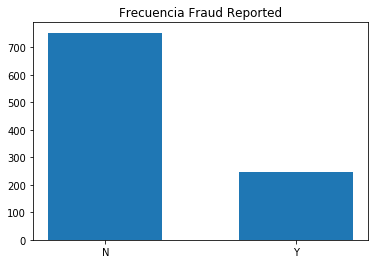

In [10]:
import matplotlib.pyplot as plt
plt.bar(df.fraud_reported.value_counts().index,df.fraud_reported.value_counts().values,width=0.6) # se utiliza el índice de la variable freq como eje de las x y el valor como eje y.
plt.xticks(df.fraud_reported.value_counts().index, ('N', 'Y')) # se cambian los valores del eje de las x
plt.title("Frecuencia Fraud Reported")
plt.show

Después del análisis realizado y para posteriores análisis separaremos las variables categóricas, numéricas y el resto de variables en listas para acceder más fácilmente a ellas.

In [11]:
num_cols = ['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss','incident_hour_of_the_day',
       'number_of_vehicles_involved','bodily_injuries',
       'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim','auto_year']
cat_cols = ['policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day','property_damage', 'police_report_available', 'auto_make',
       'auto_model']
other_cols = ['fraud_reported','policy_number', 'policy_bind_date', 'incident_date','insured_zip' ]

A continuación, procedemos a hacer un análisis de correlación para las variables numéricas. Pero primero crearemos una variable numérica de la variable respuesta (fraud_reported) para observar si hay una correlación entre estas variables y la variable objetivo.

In [12]:
df_num = df[['fraud_reported']+num_cols]
df_num['fraud_reported_num'] = np.where(df_num['fraud_reported'] == "N", 0, 1)
df_num = df_num.drop('fraud_reported',1)

corr = df_num.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported_num
months_as_customer,1,0.922098,0.0268074,0.00501768,0.0158062,0.00639932,0.0202092,0.0706393,0.0147359,-0.0101616,0.0583828,0.062108,0.0653288,0.0349398,0.0610129,-0.000292365,0.0205435
age,0.922098,1,0.0291876,0.0144037,0.0182773,-0.00707508,0.00736774,0.0871615,0.0221021,-0.0156791,0.0523587,0.0698626,0.0755223,0.0608975,0.0625876,0.00135361,0.0121434
policy_deductable,0.0268074,0.0291876,1,-0.00324545,0.0104198,0.0352117,-0.0235441,0.0609351,0.0512144,-0.0227646,0.0666385,0.0228393,0.0391068,0.0647915,0.00526909,0.0261046,0.0148173
policy_annual_premium,0.00501768,0.0144037,-0.00324545,1,-0.00610209,-0.0137384,0.0235468,-0.00157835,-0.0459912,0.0267799,0.00233161,0.00909373,-0.0176327,-0.0116539,0.0202464,-0.0492259,-0.0144796
umbrella_limit,0.0158062,0.0182773,0.0104198,-0.00610209,1,-0.0476755,-0.0236474,-0.0231789,-0.0216355,0.0222223,-0.00693136,-0.0396729,-0.0453248,-0.0229194,-0.037891,0.00923678,0.05839
capital-gains,0.00639932,-0.00707508,0.0352117,-0.0137384,-0.0476755,1,-0.0469044,-0.0164056,0.0616426,0.0558292,-0.0176514,0.0159805,0.0259337,-0.000779045,0.0158362,0.0313981,-0.0191727
capital-loss,0.0202092,0.00736774,-0.0235441,0.0235468,-0.0236474,-0.0469044,1,-0.0250537,-0.0148949,-0.0244182,-0.0413299,-0.0360603,-0.0460599,-0.0228634,-0.0326651,-0.056615,-0.0148631
incident_hour_of_the_day,0.0706393,0.0871615,0.0609351,-0.00157835,-0.0231789,-0.0164056,-0.0250537,1,0.120794,-0.0345632,0.00652692,0.217702,0.165768,0.179536,0.215626,0.0213676,0.00431585
number_of_vehicles_involved,0.0147359,0.0221021,0.0512144,-0.0459912,-0.0216355,0.0616426,-0.0148949,0.120794,1,0.0140301,-0.0146687,0.274278,0.22465,0.219084,0.269393,0.0345537,0.0518387
bodily_injuries,-0.0101616,-0.0156791,-0.0227646,0.0267799,0.0222223,0.0558292,-0.0244182,-0.0345632,0.0140301,1,-0.00560556,0.0470929,0.0473187,0.0397494,0.0434488,-0.0205274,0.0338768


Para la variable objetivo, fraud_reported, observamos que hay muy pocas variables numéricas correlacionadas con ellas. Las mejor correlacionadas son las variables vehicle_claim y total_claim_amount, seguida des de property_claim y injury_claim. A medida que aumenta una de estas variables también aumenta el valor de fraud_report, es decir está más cerca de 1 (fraude reportado). De esto podemos deducir que las grandes cantidades de dinero reclamadas en un siniestro a la aseguradora han sido reportadas como intento de fraude. Esto puede ser debido a que se investigue mejor la reclamación y se detecte el fraude.

A continuación, utilizamos la librería dython, que nos permite realizar una matriz de correlación con las variable categóricas.

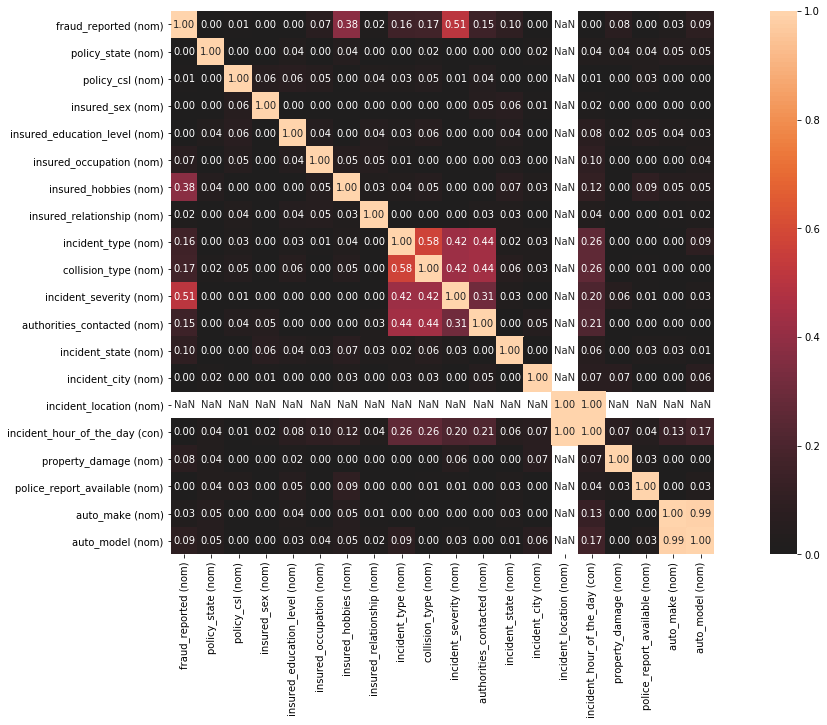

In [13]:
import dython

df_cat = df[['fraud_reported']+cat_cols]

dython.nominal.associations(df_cat,figsize=(20,10),mark_columns=True);

Para la variable objetivo, fraud_reported, observamos que las variables que están más correlacionadas son en este orden:
* incident_severity
* insured_hobbies
* collision_type
* incident_type
* authorities_contacted
* incident_state
* auto_model

Procedemos a mostrar gráficamente las variables categóricas encontradas conjuntamente con la variable objetivo:

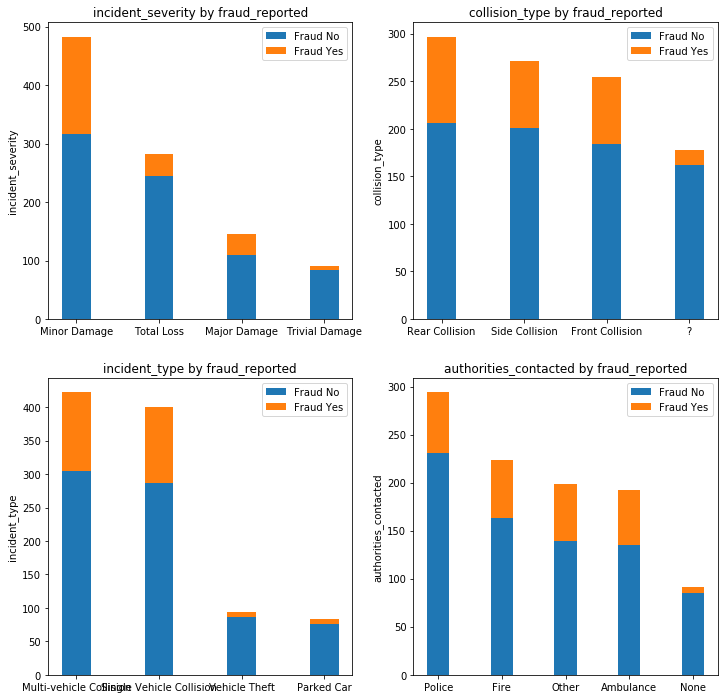

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(12, 12))
axis = axis.flatten()
types = ['incident_severity','collision_type','incident_type','authorities_contacted']

for i, t in zip(range(0,axis.size),types):
    labels = df_cat[t].value_counts().index
    Y = df_cat[df_cat.fraud_reported == "Y"][t].value_counts()
    N = df_cat[df_cat.fraud_reported == "N"][t].value_counts()
    width = 0.35
    axis[i].set_ylabel(t)
    axis[i].set_title(t+' by fraud_reported')
    axis[i].bar(labels, N, width, label='Fraud No')
    axis[i].bar(labels, Y, width, bottom=N,label='Fraud Yes')

    axis[i].legend()

plt.show()

Para las variables categóricas con pocas clases, mostramos la relación que tienen con la variable respuesta mediante un gráfico de barras apilado, teniendo en cuenta que tenemos más observaciones en las que no se reportó fraude. 
Para la variable categórica más correlacionada, incident_severity, la clase que tiene más fraudes reportados es minor damage, cabe destacar que es la más frecuente en el conjunto de datos, pero en proporción también es la que que más fraudes reportados tiene. 
Para los tipos de colisión, en general tiene la misma proporción para todas la clases excepto para aquella en el que el tipo de colisión no está informado, en la que destaca la no presencia del fraude. 
En relación al tipo de incidente, en proporción es más frecuente el fraude reportado en la colisión con un solo vehículo afectado y de más de un vehículo. En cambio no lo es tanto en los robos de vehículo y de coches aparcados. 
Para la variable de autoridades contactadas, en general, tienen la misma proporción de fraudes reportados menos en la clase de "Ninguna autoridad contactada", que no es tan frecuente pero en proporción tiene menos fraudes reportados también.



A continuación, realizaremos un gráfico circular para las variables categóricas mejor correlacionadas con la variable objetivo y con más clases dentro de ellas. Para reducir el número de segmentos que aparecen dentro del circulo, se ha creado la función *reduce_labels* que elimina las clases que tiene menos frecuencia según un umbral determinado y las agrupa en una sola clase llamada *Others*.

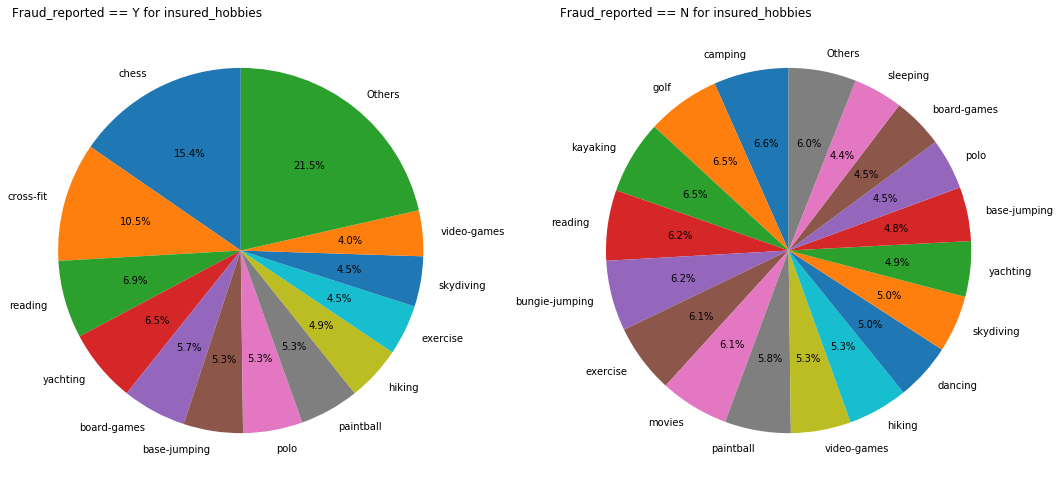

In [15]:
def reduce_labels(sizes,percentage):
    total_sum = sizes.sum()
    index = sizes.index
    sizes['Others'] = 0
    for i in index:
        if sizes[i]/total_sum < percentage:
            sizes['Others'] = sizes['Others']+sizes[i]
            sizes = sizes.drop(i)
    return sizes


sizes = reduce_labels(df_cat[df_cat.fraud_reported == "Y"].insured_hobbies.value_counts(),0.04)
labels = sizes.index

fig1, ax1 = plt.subplots(1,2,figsize=(18,12))
ax1[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[0].set_title('Fraud_reported == Y for insured_hobbies', loc='left')

sizes = reduce_labels(df_cat[df_cat.fraud_reported == "N"].insured_hobbies.value_counts(),0.04)
labels = sizes.index
ax1[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[1].set_title('Fraud_reported == N for insured_hobbies', loc='left')

plt.show()

Empezamos con la variable categórica de hobbies del asegurado. Mediante el gráfico circular, observamos que la clase más frecuente entre los fraudes reportados es el ajedrez, seguido del cross-fit. En cambio, en las observaciones que no reportaron fraude no destaca en particular ninguna clase en concreto.

Debido a que las observaciones de con fraudes reportados son menor en proporción, procedemos a ver cual es la frecuencia total de las clases chess y cross-fit en el conjunto de datos:

In [16]:
df_cat.insured_hobbies.value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

Observamos que las clases chess y cross-fit se encuentran entre las menos frecuentes, por lo que pueden ser determinantes para definir si un siniestro es un fraude o no.

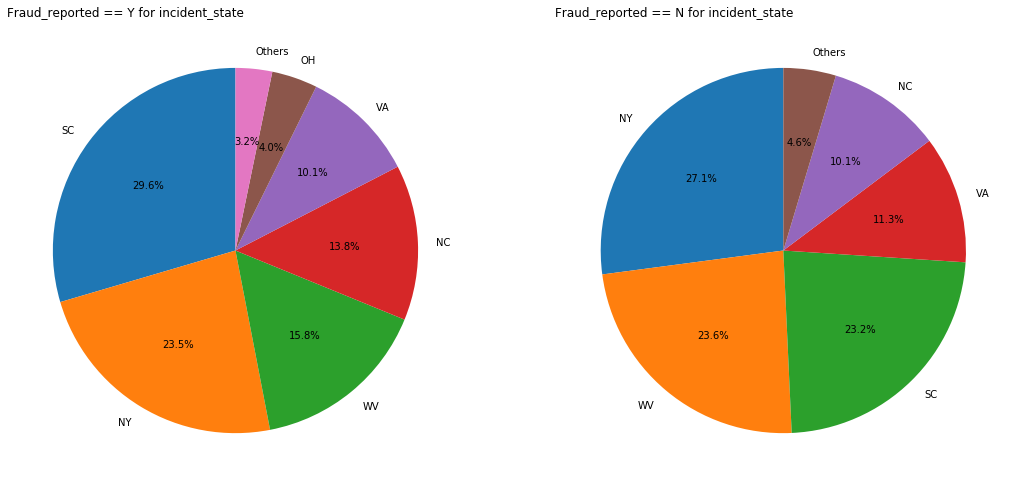

In [17]:
sizes = reduce_labels(df_cat[df_cat.fraud_reported == "Y"].incident_state.value_counts(),0.04)
labels = sizes.index

fig1, ax1 = plt.subplots(1,2,figsize=(18,12))
ax1[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[0].set_title('Fraud_reported == Y for incident_state', loc='left')

sizes = reduce_labels(df_cat[df_cat.fraud_reported == "N"].incident_state.value_counts(),0.04)
labels = sizes.index
ax1[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[1].set_title('Fraud_reported == N for incident_state', loc='left')

plt.show()

Continuando con el análisis explotario de datos, observamos que la clase más frecuente en los siniestros clasificados como fraude dentro de la vairable incident_state es Carolina del Sur (SC - South Carolina) seguido de Nueva York (NY) y WV (Virginia Occidental - West Virginia) . En los siniestros sin fraude reportado, tenemos que el estado más frecuente es Nueva York, seguido de Virginia Occidental y South Carolina. Como podemos observar no es que haya muchas diferenciación entre clases según la variable objetivo.

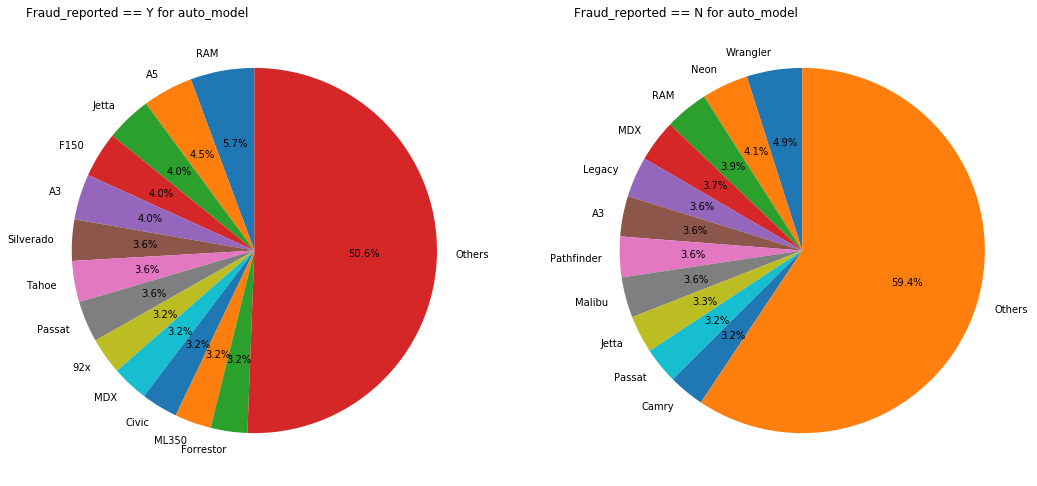

In [18]:
sizes = reduce_labels(df_cat[df_cat.fraud_reported == "Y"].auto_model.value_counts(),0.03)
labels = sizes.index

fig1, ax1 = plt.subplots(1,2,figsize=(18,12))
ax1[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[0].set_title('Fraud_reported == Y for auto_model', loc='left')

sizes = reduce_labels(df_cat[df_cat.fraud_reported == "N"].auto_model.value_counts(),0.03)
labels = sizes.index
ax1[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1[1].set_title('Fraud_reported == N for auto_model', loc='left')

plt.show()

Según el modelo de coches, el modelo RAM es el más frecuente para los siniestros fraudulentos y el wrangler para los siniestros no fraudulentos. No hay una clase que destaque mucho según si el sinistro es fraudulento o no.



A continuación, procedemos a mostrar gráficamente las variables numéricas mejor correlacionadas con la variable objetivo mediante swarm plots:

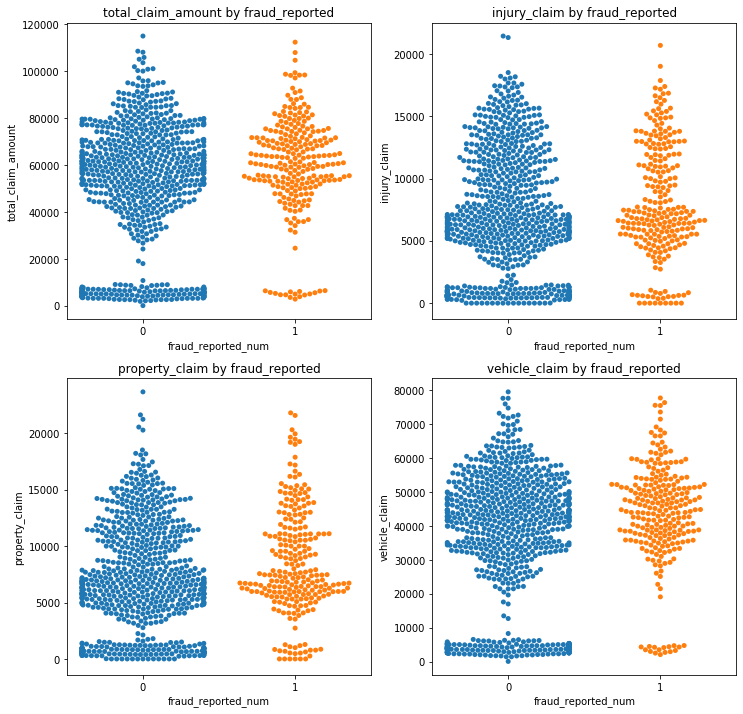

In [19]:
fig, axis = plt.subplots(2, 2, figsize=(12, 12))
axis = axis.flatten()
types = ['total_claim_amount','injury_claim','property_claim','vehicle_claim']

for i, t in zip(range(0,axis.size),types):
    sns.swarmplot(ax= axis[i],x="fraud_reported_num", y=t, data=df_num)
    axis[i].set_title(t+' by fraud_reported')

plt.show()

Como podemos observar (siniestros sin fraude de color azul y siniestros con fraude de color naranja), no hay mucha diferencia en las proporciones según estas variables. Ya se podía observar que su correlación tampoco es que fuera muy grande. 

### 3. Preparación del conjunto de datos.

A continuación, se detallan los algoritmos de aprendizaje automático a aplicar al conjunto de datos:
* Regresión Logística
* Decision Tree
* Random_Forest
* Naïve Bayes
* XGBoost

Debido a la gran presencia de variables categóricas en el conjunto de datos, es necesario transformar estas variables para que los algoritmos que solamente tratan variables numéricas sean capaces de interpretarlas.


Para ello crearemos variables dummies para cada una de estas variables. De esta manera tendremos una variable por cada clase dentro de cada variable. Cada reclamacion tendrá un 1 en esa variable si se correspondía con la clase o un 0 en caso contrario.

Primero de todo creamos una copia conjunto de datos sin algunas de las variables que no aportan mucho en la determinación de la variable objetivo:
- policy_number: no se considera porque corresponde con el número identificativo de la póliza. No tiene influencia en predecir si un siniestro es fraude o no.
- policy_bind_date: la fecha de inicio de la póliza, es un campo informativo y por lo tanto no se considera.
- incident_date: la fecha del incidente que ocasiona el siniestro, .
- incident_location: dirección donde ocurrió el accidente, hay un valor distinto para cada reclamación del conjunto de datos por lo que no aportaría en la determinación de si una reclamación es fraude o no.
- insured_zip: el código postal también es un campo informativo.

Adicionalmente, también eliminamos las variables relacionadas con los autos, ya que disponen de muchas clases y podría aumentar de forma considerable el tamaño del conjunto de datos y, como ya se observó en el análisis previo, tampoco son muy determinantes para la variable objetivo. Por el mismo motivo, eliminamos la variable incident_hour_of_the_day.

In [20]:
df_v2 = df
df_v2 = df_v2.drop(['policy_number', 'policy_bind_date', 'incident_date','incident_location',
                    'insured_zip','incident_hour_of_the_day','auto_make','auto_model'],1)

In [21]:
df_v3=pd.get_dummies(df_v2,columns=['insured_sex','insured_education_level','insured_occupation','policy_state', 'policy_csl',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','authorities_contacted','property_damage','police_report_available'],drop_first=True)

In [22]:
df_v3.shape

(1000, 93)

Observamos que ahora se dispone de un total de 93 variables (antes 40).

In [23]:
df_v3.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_year', 'fraud_reported', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-

A continuación, con tal de solucionar el desbalance de datos que se dispone entre siniestros reportados como fraude y siniestros sin fraude, utilizaremos la libreria SMOTE para realizar un over-sampling y tener igual proporción de observaciones.

In [24]:
x_Dummies = df_v3.drop(['fraud_reported'],axis=1)
y_Dummies = df_v3['fraud_reported']

In [25]:
from imblearn.over_sampling import SMOTE

x_Dummies, y_Dummies  = SMOTE(random_state=15).fit_resample(x_Dummies, y_Dummies)

print(x_Dummies.shape)
print(y_Dummies.shape)

(1506, 92)
(1506,)


In [26]:
print(y_Dummies.value_counts())

Y    753
N    753
Name: fraud_reported, dtype: int64


Con la intención de ver qué variables son las más relevantes para el conjunto de datos con dummies, procedemos a aplicar el algoritmo de Boruta: 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

#Primero de todo, definimos un clasificador de RandomForest para aplicar el algoritmo de Boruta (los parámetros utilizados
# se han obtenido del mejor clasificador de RandomForest con todas las variables Dummies de la parte 2 de aplicación de algoritmos
# de ML.)
RF_Dummies_Boruta = RandomForestClassifier(criterion= 'entropy', max_depth=15)

RF_Dummies_Boruta = RF_Dummies_Boruta.fit(np.array(x_Dummies),np.array(y_Dummies))

# Definimos el selector de Boruta
boruta_selector = BorutaPy(RF_Dummies_Boruta, n_estimators='auto', random_state=15)

# Entrenamos el selector de Boruta para determinar las variables relevantes.
boruta_selector.fit(np.array(x_Dummies), np.array(y_Dummies))


BorutaPy(estimator=RandomForestClassifier(criterion='entropy', max_depth=15,
                                          n_estimators=26,
                                          random_state=<mtrand.RandomState object at 0x000001C6ADF2CAF8>),
         n_estimators='auto',
         random_state=<mtrand.RandomState object at 0x000001C6ADF2CAF8>)

In [28]:
# Unimos los nombres de las columnas, el ranking y las variables seleccionadas en un iterador:
ranking_variables = list(zip(x_Dummies.columns, boruta_selector.ranking_, boruta_selector.support_))

# Mostramos el ranking
for variable in ranking_variables:
    print('Variables: {:<25} Ranking: {},  Mantener: {}'.format(variable[0], variable[1], variable[2]))

Variables: months_as_customer        Ranking: 1,  Mantener: True
Variables: age                       Ranking: 5,  Mantener: False
Variables: policy_deductable         Ranking: 7,  Mantener: False
Variables: policy_annual_premium     Ranking: 2,  Mantener: False
Variables: umbrella_limit            Ranking: 23,  Mantener: False
Variables: capital-gains             Ranking: 10,  Mantener: False
Variables: capital-loss              Ranking: 9,  Mantener: False
Variables: number_of_vehicles_involved Ranking: 20,  Mantener: False
Variables: bodily_injuries           Ranking: 26,  Mantener: False
Variables: witnesses                 Ranking: 12,  Mantener: False
Variables: total_claim_amount        Ranking: 1,  Mantener: True
Variables: injury_claim              Ranking: 1,  Mantener: True
Variables: property_claim            Ranking: 1,  Mantener: True
Variables: vehicle_claim             Ranking: 1,  Mantener: True
Variables: auto_year                 Ranking: 4,  Mantener: False
Variable

Según el algoritmo de Boruta, las variables más relevantes para determinar si una reclamación es fraude o no son las siguientes (ranking 1):
* months_as_customer
* total_claim_amount
* injury_claim
* property_claim
* vehicle_claim
* incident_severity_Minor Damage
* incident_severity_Total Loss



In [29]:
x_Dummies_Boruta = x_Dummies[x_Dummies.columns[boruta_selector.support_]]
x_Dummies_Boruta.shape

(1506, 7)

In [30]:
x_Dummies.columns[boruta_selector.support_]

Index(['months_as_customer', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss'],
      dtype='object')

Una vez creado el conjunto de datos con los dummies, procedemos a crear un nuevo conjunto de datos aplicando PCA con el objetivo de reducir el número de variables a tratar utilizando los componentes principales que expliquen un 95% de la varianza del conjunto de datos:

In [31]:
from sklearn.preprocessing import StandardScaler

x_Dummies_aux1 = StandardScaler().fit_transform(x_Dummies_Boruta)
pca = PCA(n_components=0.95)
x_Dummies_PCA = pca.fit_transform(x_Dummies_aux1)

print("Aplicando PCA, obtenemos un total de "+str(len(pca.explained_variance_ratio_))+" componentes")
print("Que explican la siguiente varianza: "+ str(round(sum(pca.explained_variance_ratio_)*100,2))+"%")

Aplicando PCA, obtenemos un total de 5 componentes
Que explican la siguiente varianza: 96.41%


Finalmente, hemos obtenido dos conjuntos de datos para entrenar los algoritmos de Machine Learning y predecir si la reclamación de un siniestro es un posible fraude o no:

- Conjunto de datos con Dummies con las variables más significantes según el algoritmo de Boruta (6 variables)
- Conjunto de datos con los 5 componentes principales más explicativos del conjunto de datos anterior.

Procedemos a guardar en ficheros los conjuntos de datos obtenidos:

In [32]:
x_Dummies_Boruta.to_csv('x_Dummies_Boruta.csv', index=False)
y_Dummies.to_csv('y_Dummies.csv', index=False, header = ['fraud_reported'])
np.savetxt('x_Dummies_PCA.csv', x_Dummies_PCA, delimiter=',')

### 4. Principal Component Analysis

En este apartado, analizaremos los componentes principales obtenidos para determinar qué explica cada uno de ellos. Para ello, mostraremos los componentes gráficamente.

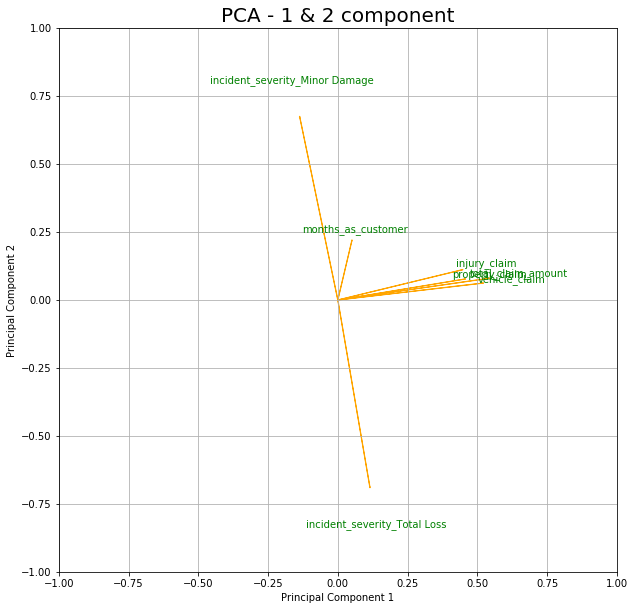

In [33]:
# Creamos el gráfico:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA - 1 & 2 component', fontsize = 20)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
    
#Procedemos a mostrar las flechas de los diferentes componentes:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'orange',alpha = 1)
        ax.text(coeff[i,0]* 1.20, coeff[i,1] * 1.20, x_Dummies_Boruta.columns[i], color = 'g', ha = 'center', va = 'center')
ax.grid()

In [34]:
print("Los PC 1 y 2 explican la siguiente varianza: "+ str(round(sum(pca.explained_variance_ratio_[0:2])*100,2))+"%")

Los PC 1 y 2 explican la siguiente varianza: 64.93%


Los 2 primeros componentes principales llegan a explicar el cerca del 65% de la varianza del conjunto de datos.
El primer componente principal, está relacionado con los importes reclamados en el siniestro (injury_claim, vehicle_claim, property_claim y total_claim.
Mientras que el segundo componente contrapone los incidentes de menor severidad y los meses de antigüedad como cliente con los incidentes categorizados en severidad como Pérdida Total.

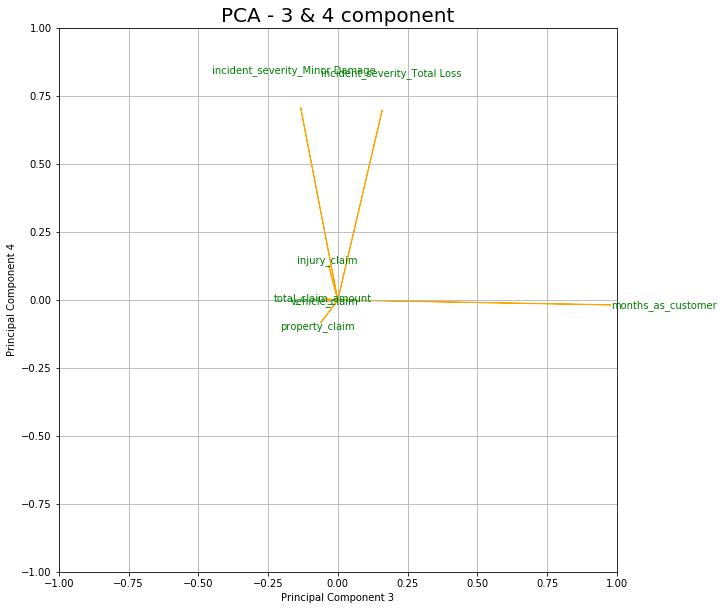

In [35]:
# Creamos el gráfico:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA - 3 & 4 component', fontsize = 20)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
    
#Procedemos a mostrar las flechas de los diferentes componentes:
coeff = np.transpose(pca.components_[2:4, :])
n = coeff.shape[0]
for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'orange',alpha = 1)
        ax.text(coeff[i,0]* 1.20, coeff[i,1] * 1.20, x_Dummies_Boruta.columns[i], color = 'g', ha = 'center', va = 'center')
ax.grid()

In [36]:
print("Los PC 3 y 4 explican la siguiente varianza: "+ str(round(sum(pca.explained_variance_ratio_[3:4])*100,2))+"%")

Los PC 3 y 4 explican la siguiente varianza: 10.38%


El tercer y cuarto componente principal explican un 24% de la varianza del conjunto de datos.
El tercer componente principal, está relacionada con los meses de antigüedad del cliente y la cuerta componente está relacionada con la severidad del incidente

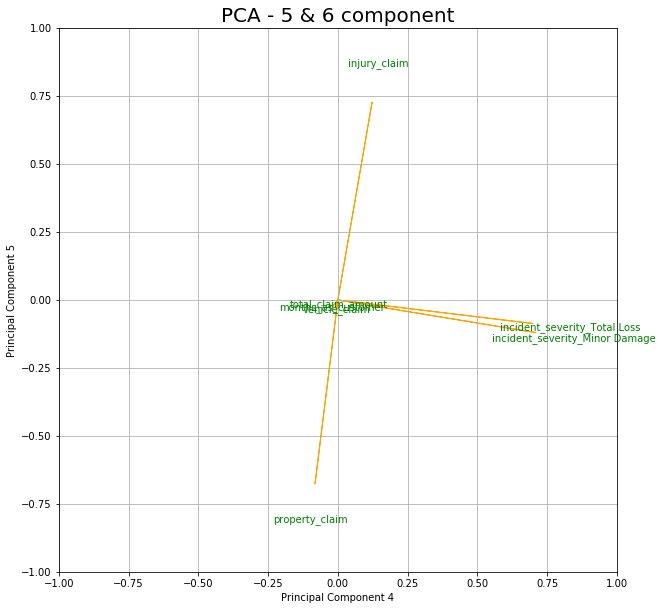

In [37]:
# Creamos el gráfico:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4', fontsize = 10)
ax.set_ylabel('Principal Component 5', fontsize = 10)
ax.set_title('PCA - 5 & 6 component', fontsize = 20)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
    
#Procedemos a mostrar las flechas de los diferentes componentes:
coeff = np.transpose(pca.components_[3:5, :])
n = coeff.shape[0]
for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'orange',alpha = 1)
        ax.text(coeff[i,0]* 1.20, coeff[i,1] * 1.20, x_Dummies_Boruta.columns[i], color = 'g', ha = 'center', va = 'center')
ax.grid()

In [38]:
print("El PC 5 explica la siguiente varianza: "+ str(round(sum(pca.explained_variance_ratio_[4:5])*100,2))+"%")

El PC 5 explica la siguiente varianza: 7.05%


Finalmente, el quinto componente principal contrapone las reclamaciones por lesiones con las reclamaciones por propiedades.